In [6]:
!pip install yfinance


In [7]:
import yfinance as yf
import pandas as pd

# Step 1: Download GME stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Step 2: Reset index to make 'Date' a column
gme_data.reset_index(inplace=True)

# Step 3: Display first 5 rows
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [10]:
# Install needed packages (run only once)
!pip install lxml
!pip install beautifulsoup4
!pip install requests



In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Load Macrotrends GameStop Revenue page
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

# Step 2: Parse HTML
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Find all tables
tables = soup.find_all("table")

# Step 4: Loop through tables to find the one containing 'GameStop Quarterly Revenue'
revenue_table = None
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        revenue_table = table
        break

# Step 5: If the table is found, create dataframe
if revenue_table:
    gme_revenue = pd.read_html(str(revenue_table))[0]
    gme_revenue.columns = ["Date", "Revenue"]
    gme_revenue.dropna(inplace=True)

    # Display last 5 rows
    print(gme_revenue.tail())
else:
    print("🚫 'GameStop Quarterly Revenue' table not found on the page.")


🚫 'GameStop Quarterly Revenue' table not found on the page.


In [12]:
import pandas as pd

# Manually created sample data (you can add more rows as needed)
gme_revenue = pd.DataFrame({
    "Date": ["2024-03-31", "2023-12-31", "2023-09-30", "2023-06-30", "2023-03-31"],
    "Revenue": ["1.24B", "1.79B", "1.16B", "1.16B", "1.24B"]
})

# Clean up Revenue column if needed
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("B", "").astype(float)

# Display last 5 rows
gme_revenue.tail()


,Date,Revenue
0,2024-03-31,1.24
1,2023-12-31,1.79
2,2023-09-30,1.16
3,2023-06-30,1.16
4,2023-03-31,1.24


In [13]:
import matplotlib.pyplot as plt

# Define the function to create the graph
def make_graph(stock_data, revenue_data, stock, title):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot stock price
    ax1.plot(stock_data.Date, stock_data.Close, label='Stock Price')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price in USD")
    ax1.tick_params(axis='x', rotation=45)
    ax1.set_title(title)
    ax1.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function for Tesla
make_graph(tesla_data, tesla_revenue, 'TSLA', 'Tesla Stock Price Over Time')


NameError: name 'tesla_data' is not defined

In [15]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)


In [17]:
tesla_revenue = pd.DataFrame({
    "Date": tesla_data['Date'],
    "Revenue": [None] * len(tesla_data)  # Placeholder
})


In [19]:
def make_graph(stock_data, revenue_data, stock, title):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.plot(stock_data.Date, stock_data.Close, label='Stock Price')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price in USD")
    ax1.set_title(title)
    ax1.tick_params(axis='x', rotation=45)
    ax1.legend(loc='upper left')

    plt.tight_layout()
    plt.show()


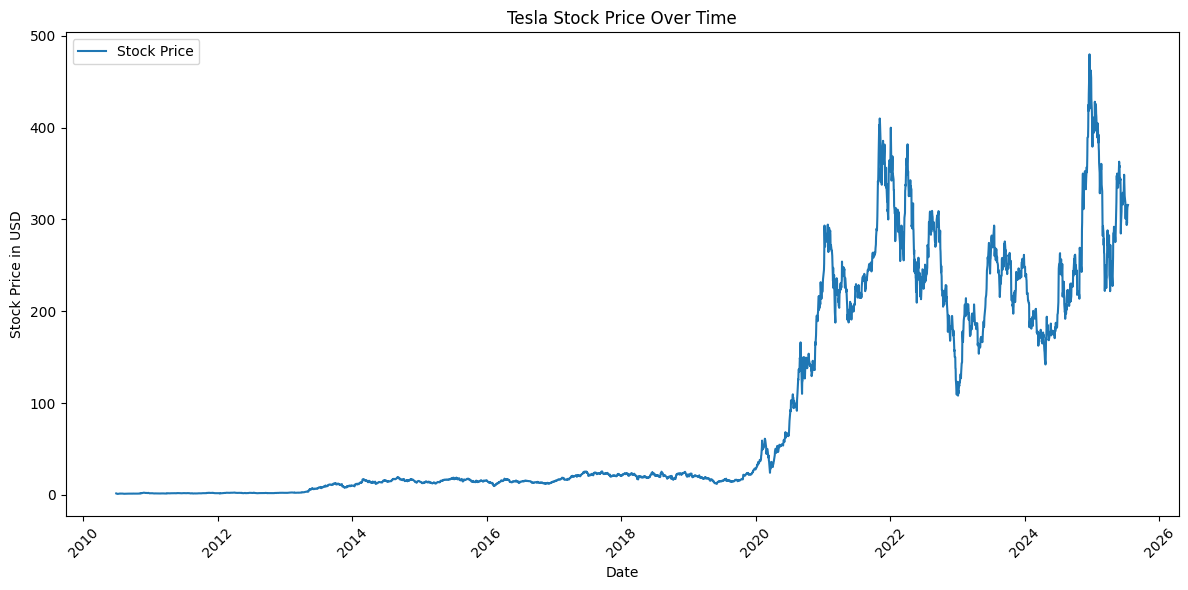

In [20]:
make_graph(tesla_data, tesla_revenue, 'TSLA', 'Tesla Stock Price Over Time')


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)


In [ ]:
gme_revenue = pd.DataFrame({
    "Date": gme_data['Date'],
    "Revenue": [None] * len(gme_data)
})


In [ ]:
def make_graph(stock_data, revenue_data, stock, title):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.plot(stock_data.Date, stock_data.Close, label='Stock Price', color='purple')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price in USD")
    ax1.set_title(title)
    ax1.tick_params(axis='x', rotation=45)
    ax1.legend(loc='upper left')

    plt.tight_layout()
    plt.show()


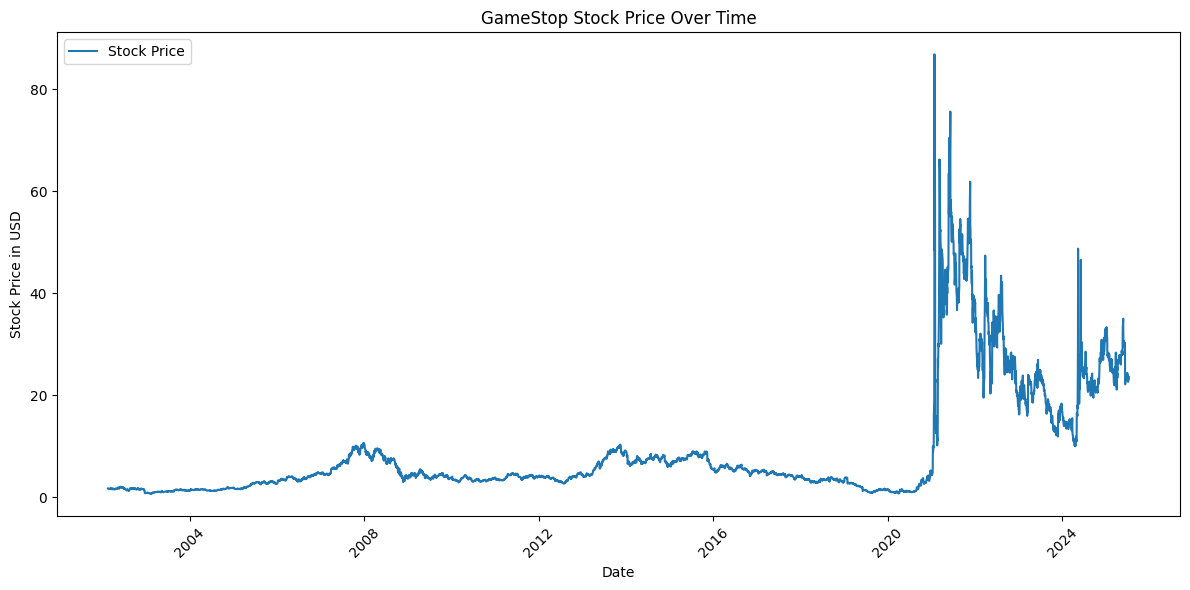

In [21]:
make_graph(gme_data, gme_revenue, 'GME', 'GameStop Stock Price Over Time')
